In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Load processed data

In [2]:
X_train = pd.read_csv('../data/processed/X_train.csv')  # Scaled features
y_train = pd.read_csv('../data/processed/y_train.csv').squeeze()  # Target


### Feature Selection

In [3]:
print("Available Features:")
print(X_train.columns.tolist())

Available Features:
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'log_crim', 'log_lstat']


# Select features based on EDA (modify as needed)

In [4]:
selected_features = ['rm', 'lstat', 'ptratio', 'indus', 'nox']
X_train_selected = X_train[selected_features]

###  Model Training

In [5]:
model = LinearRegression()
model.fit(X_train_selected, y_train)

LinearRegression()

# Check coefficients

In [6]:
print("\nModel Coefficients:")
for feature, coef in zip(selected_features, model.coef_):
    print(f"{feature:>8}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")


Model Coefficients:
      rm: 3.5256
   lstat: -3.9716
 ptratio: -1.9842
   indus: 0.5706
     nox: -0.5649

Intercept: 22.4261


###  Quick Validation (on training data)

In [7]:
y_pred = model.predict(X_train_selected)
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print("\nTraining Set Performance:")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")


Training Set Performance:
MSE: 27.10
R2 Score: 0.69


###  Save Model

In [8]:
joblib.dump(model, '../models/housing_model.pkl')
print("\nModel saved to ../models/housing_model.pkl")


Model saved to ../models/housing_model.pkl


###  Visualization

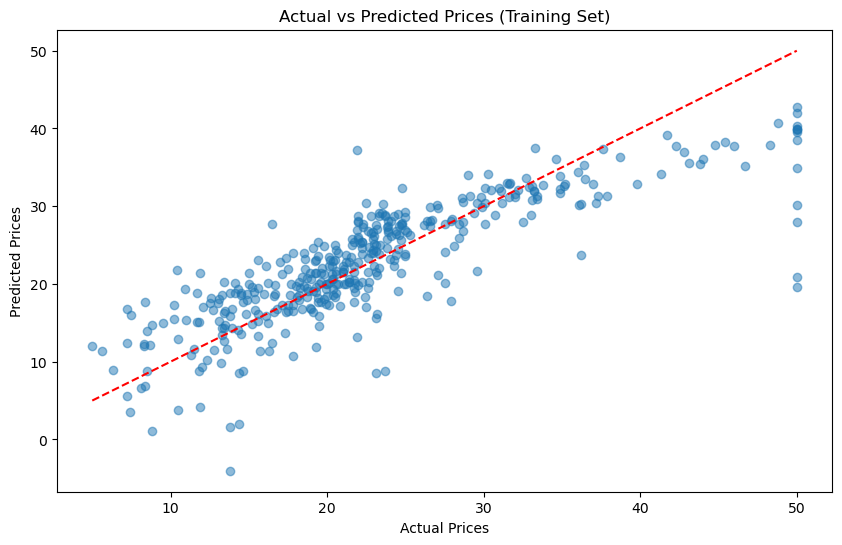

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], 
         [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices (Training Set)")
plt.show()